# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [ ]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.19.0


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [ ]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/GreatLearning/vision/images_proj.npy')

In [ ]:
# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/GreatLearning/vision/Labels_proj.csv')

In [ ]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


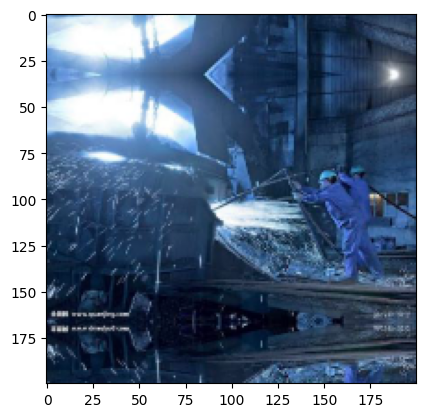

In [ ]:
plt.imshow(images[5])

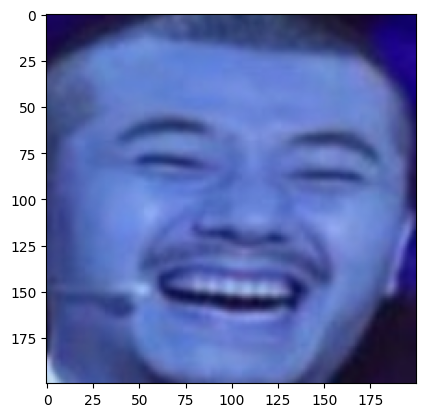

In [ ]:
plt.imshow(images[400])

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

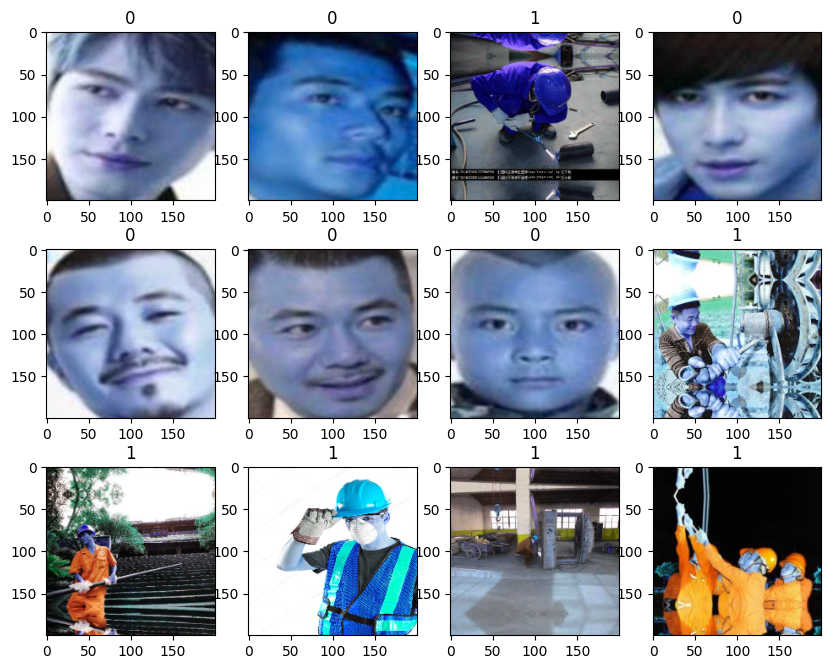

In [ ]:
plot_images(images,labels)

## Checking for class imbalance


Map numerical labels to descriptive names
Subtask:
Create a new column in the labels DataFrame with descriptive names ('Without Helmet', 'With Helmet') based on the numerical labels (0, 1).





In [ ]:
label_mapping = {0: 'Without Helmet', 1: 'With Helmet'}
labels['Descriptive_Label'] = labels['Label'].map(label_mapping)
print(labels.head())

   Label Descriptive_Label
0      1       With Helmet
1      1       With Helmet
2      1       With Helmet
3      1       With Helmet
4      1       With Helmet


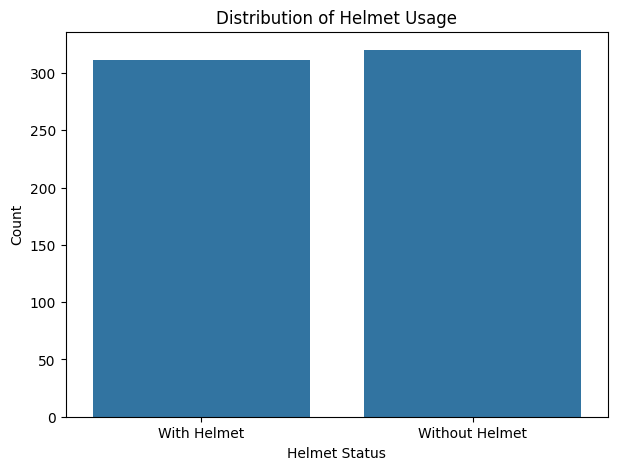

In [ ]:

plt.figure(figsize=(7, 5))
sns.countplot(data=labels, x='Descriptive_Label')
plt.title('Distribution of Helmet Usage')
plt.xlabel('Helmet Status')
plt.ylabel('Count')
plt.show()

As you can see from the above plot, the dataset is quite balanced.
There are about 300 images in each category

# **Data Preprocessing**

## Resizing images

Resizing images
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

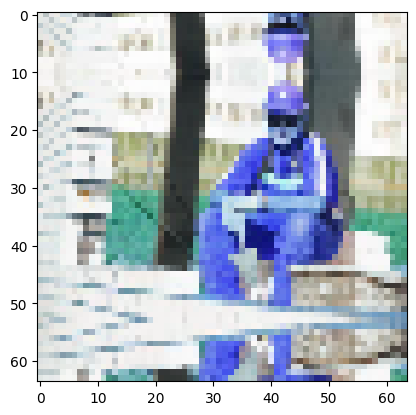

In [ ]:
plt.imshow(images_decreased[50]);

## Converting images to grayscale

In [ ]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

In [ ]:
gray_images = []
for i in range(len(images_decreased)):
  gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

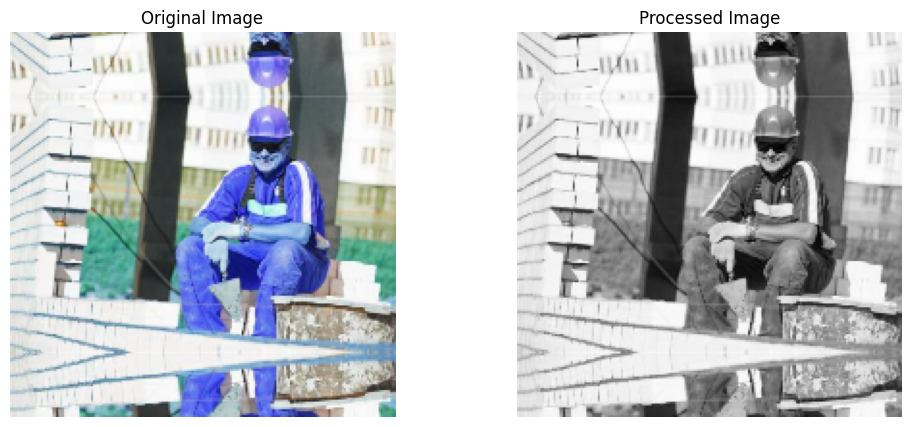

In [ ]:
# choosing an image
n = 50
# plotting the original and preprocessed image
grid_plot(images[n],gray_images[n],gray=True)

### Gaussian blur

We do apply Gaussian Blur to reduce noise the images

In [ ]:
gaus_blur_images = []
for i in range(len(gray_images)):
  gaus_blur_images.append(cv2.GaussianBlur(images[i], (3,3), 0))

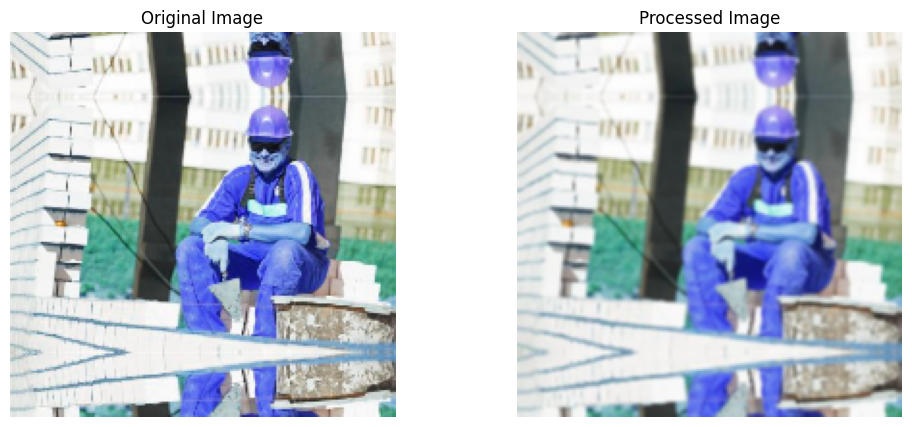

In [ ]:
# choosing an image
n = 50
# plotting the original and preprocessed image
grid_plot(images[n],gaus_blur_images[n])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

### Laplacian Filter


Laplacian filtering relies on detecting changes in pixel intensity, which is directly represented in grayscale images.

In [ ]:
edge_images = []
for i in range(len(gray_images)):
    edge_images.append(cv2.Laplacian(images[i],cv2.CV_64F))

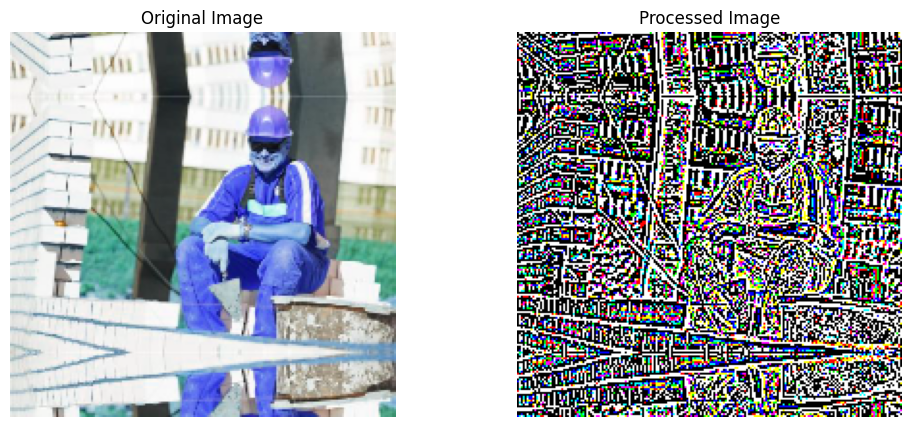

In [ ]:
# choosing an image
n = 50
# plotting the original and preprocessed image
grid_plot(images[n],edge_images[n],gray=True)



*   Based on this, the edge feature does not appear to be useful.


*   It is also capturing the background. So might creates issues.



### Splitting the dataset



In [ ]:
# Splitting the Gray into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets

X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 64, 64, 3) (504, 2)
(63, 64, 64, 3) (63, 2)
(64, 64, 64, 3) (64, 2)


In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train['Label'])
y_val_encoded=enc.transform(y_val['Label'])
y_test_encoded=enc.transform(y_test['Label'])

### Data Normalization

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    # The target is already a numpy array from y_train_encoded/y_val_encoded/y_test_encoded
    target = target.reshape(-1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    # The target is already a numpy array from y_train_encoded/y_val_encoded/y_test_encoded
    target = target.reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    # Set tick labels for better interpretability
    ax.set_xticklabels(['Without Helmet', 'With Helmet'])
    ax.set_yticklabels(['Without Helmet', 'With Helmet'])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [ ]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid') # Binary classification
])

opt = Adam() # Ensure optimizer is defined if not already
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model_1.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,937 (124.75 KB)

 Trainable params: 31,937 (124.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# X_train_normalized and X_val_normalized are already in the correct 4-dimensional (samples, height, width, channels) format
# No further reshaping is needed as model_1 expects (64, 64, 3) input

history_model1 = model_1.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.6765 - loss: 0.6639 - val_accuracy: 0.8730 - val_loss: 0.5535
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8359 - loss: 0.5622 - val_accuracy: 0.6349 - val_loss: 0.5527
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.7548 - loss: 0.5042 - val_accuracy: 0.8730 - val_loss: 0.4129
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9219 - loss: 0.3870 - val_accuracy: 0.9365 - val_loss: 0.3604
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9479 - loss: 0.3242 - val_accuracy: 0.9048 - val_loss: 0.2575
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9333 - loss: 0.2545 - val_accuracy: 0.9683 - val_loss: 0.2063
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9645 - loss: 0.1884 - val_accuracy: 0.9841 - val_loss: 0.1257
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9750 - loss: 0.1366 - val_accuracy: 0.9841 - val_loss: 0.1052
E

In [ ]:

model_1_test_perf = model_performance_classification(model_1, X_test_normalized, y_test_encoded)

print("Model 1 Test performance metrics")
print(model_1_test_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
Model 1 Test performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.984375  0.984375   0.984848  0.984371


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


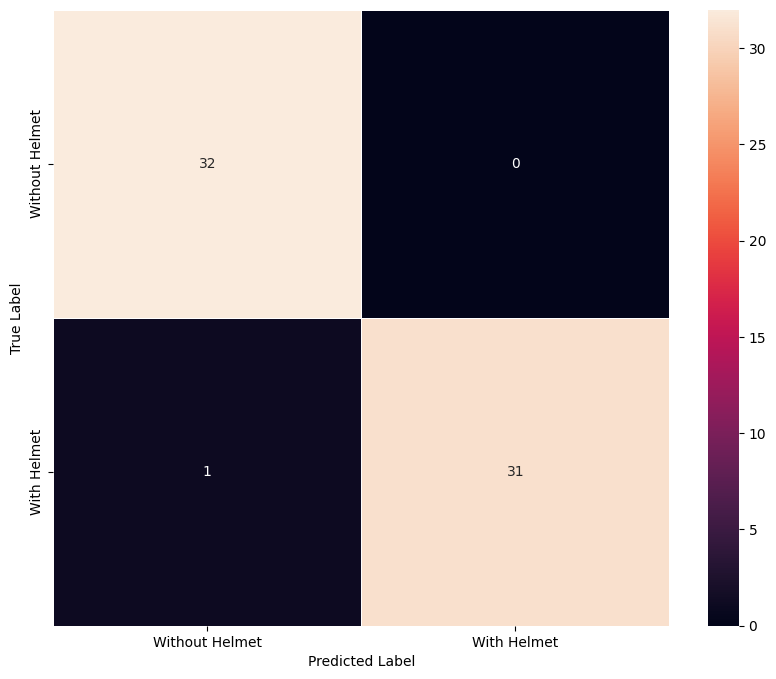

In [ ]:
plot_confusion_matrix(model_1, X_test_normalized, y_test_encoded)

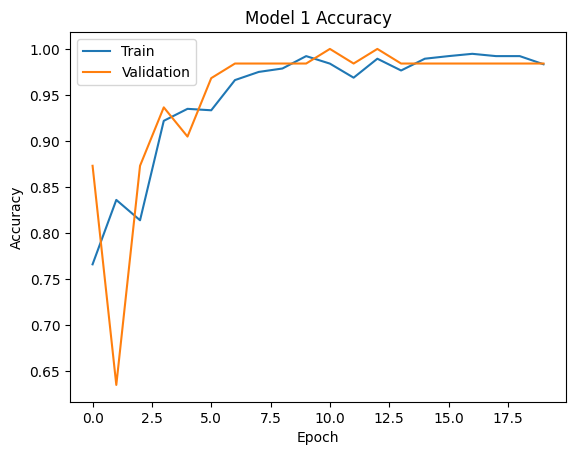

In [ ]:
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.984127  0.984127   0.984608  0.984119


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


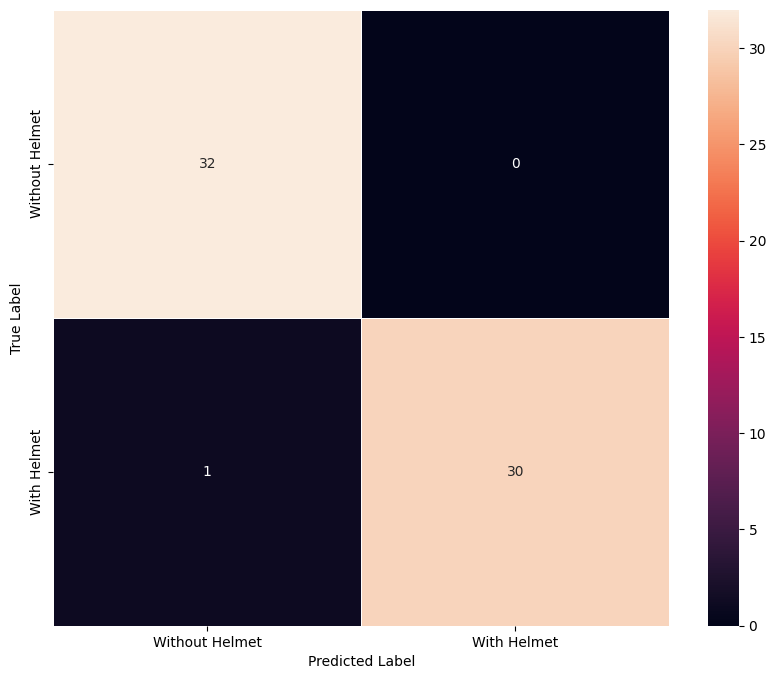

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

### Vizualizing the predictions

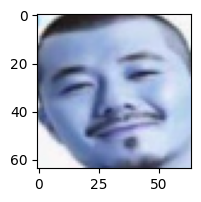

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Predicted Label Without Helmet
True Label Without Helmet


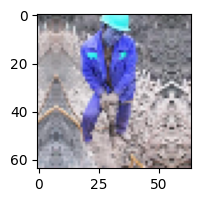

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label With Helmet
True Label With Helmet


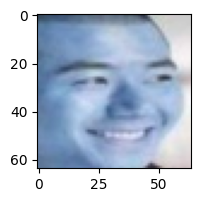

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Label Without Helmet
True Label Without Helmet


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3))))[0]])   # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[2]])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_1.predict((X_val_normalized[50].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[50]])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_1.predict((X_val_normalized[36].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[36]])                                              # using inverse_transform() to get the output label from the output vector


## Model 2: (VGG-16 (Base))

We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer (output).

In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid'))
opt=Adam()
# Compile model
model_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model_2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,716,737 (56.14 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Epochs
epochs = 20
# Batch size
batch_size = 128

history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5586 - loss: 0.7084 - val_accuracy: 0.8571 - val_loss: 0.5724
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7891 - loss: 0.5638 - val_accuracy: 0.9048 - val_loss: 0.5264
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9076 - loss: 0.4961 - val_accuracy: 0.9683 - val_loss: 0.4097
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9844 - loss: 0.4233 - val_accuracy: 0.9683 - val_loss: 0.3767
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9786 - loss: 0.3582 - val_accuracy: 1.0000 - val_loss: 0.2955
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9844 - loss: 0.2866 - val_accuracy: 1.0000 - val_loss: 0.2732
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9963 - loss: 0.2632 - val_accuracy: 1.0000 - val_loss: 0.2176
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9922 - loss: 0.2144 - val_accuracy: 1.0000 - val_loss: 0.2028
Ep

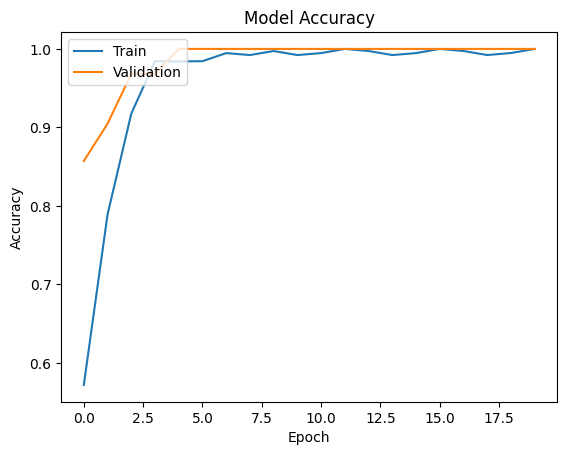

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.996032  0.996032   0.996063  0.996032


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


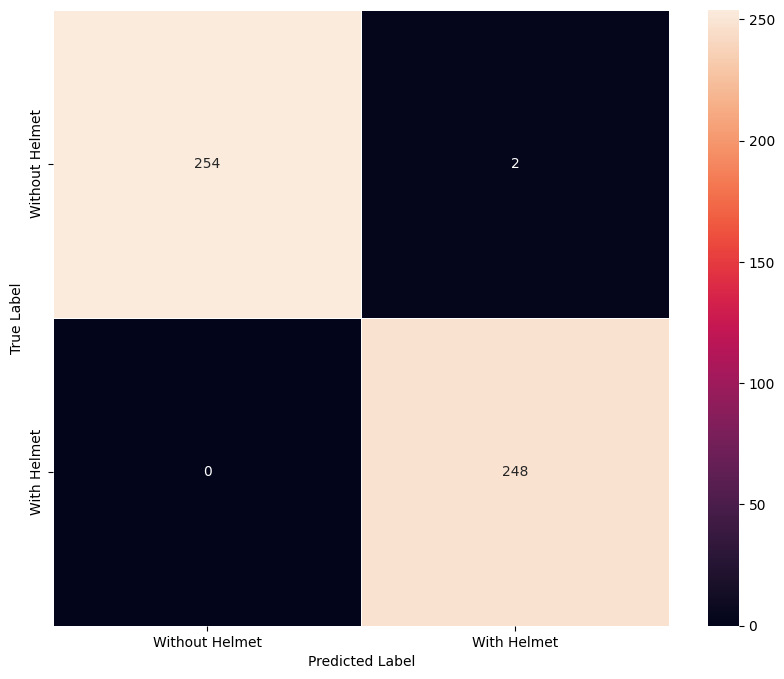

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


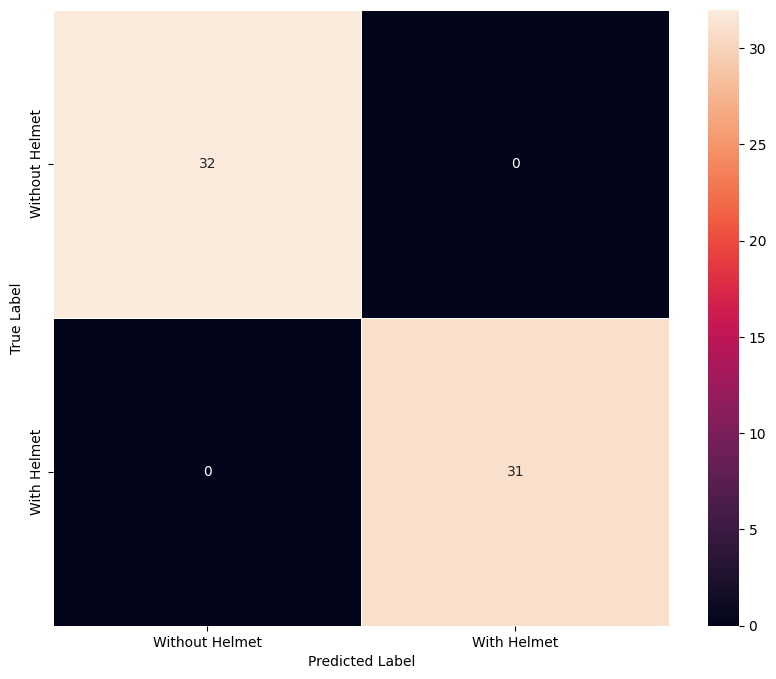

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

### Visualizing the prediction:

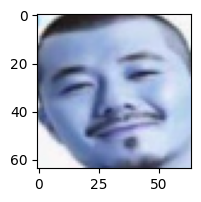

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Predicted Label Without Helmet
True Label Without Helmet


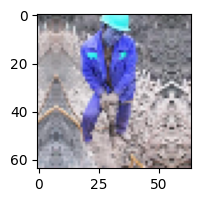

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label With Helmet
True Label With Helmet


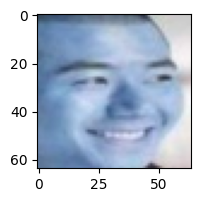

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label Without Helmet
True Label Without Helmet


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_2.predict((X_val_normalized[2].reshape(1,64,64,3))))[0]])   # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[2]])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_2.predict((X_val_normalized[50].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[50]])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_2.predict((X_val_normalized[36].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[36]])                                              # using inverse_transform() to get the output label from the output vector


## Model 3: (VGG-16 (Base + FFNN))

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam()
# Compile model
model_3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model_3.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,489 (58.16 MB)

 Trainable params: 532,801 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)




Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.6243 - loss: 0.6815 - val_accuracy: 1.0000 - val_loss: 0.1733
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9583 - loss: 0.2226 - val_accuracy: 1.0000 - val_loss: 0.0888
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9977 - loss: 0.0831 - val_accuracy: 1.0000 - val_loss: 0.0244
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9766 - loss: 0.0557 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9954 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9922 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9898 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9922 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.00

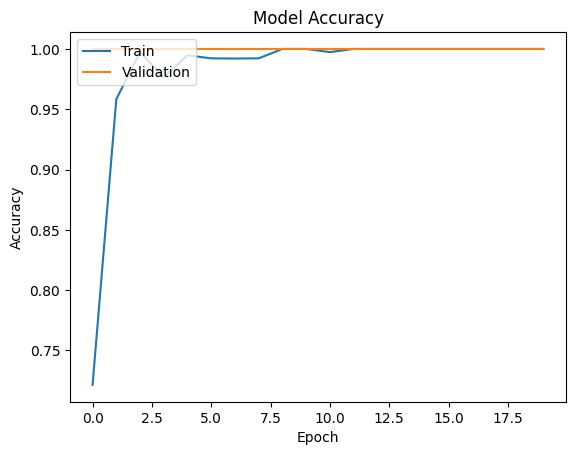

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


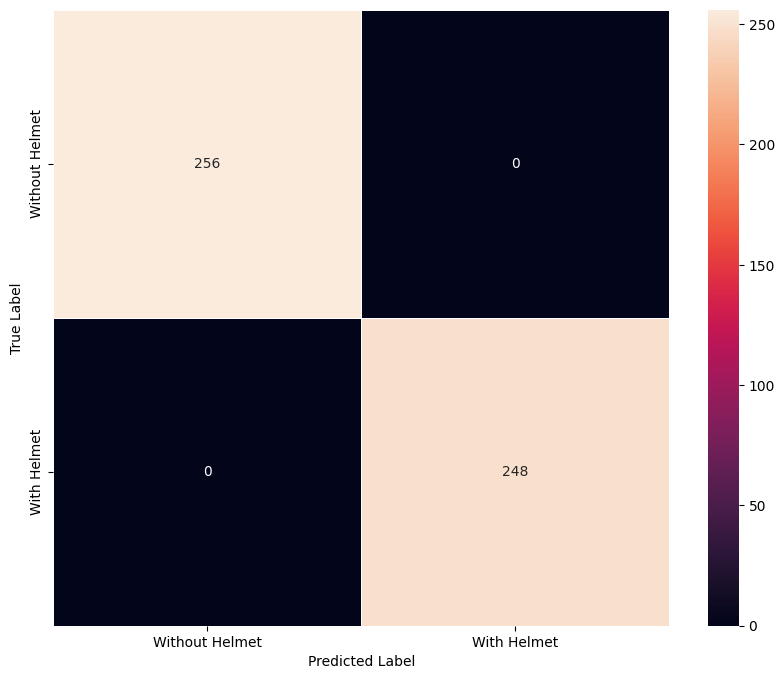

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


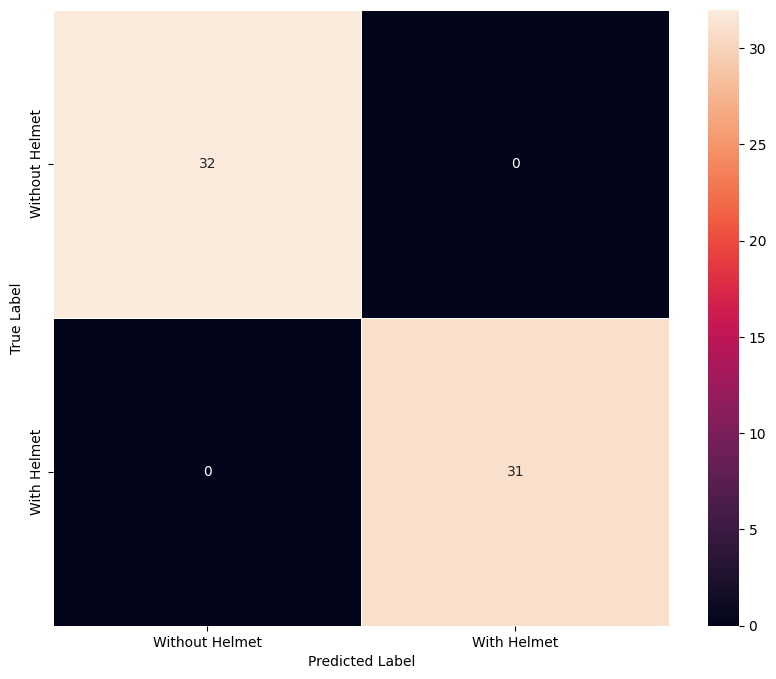

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

#### Visualizing the predictions

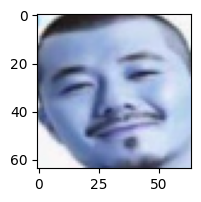

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Predicted Label Without Helmet
True Label Without Helmet


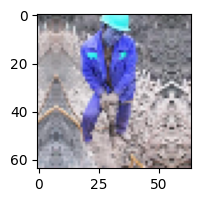

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label With Helmet
True Label With Helmet


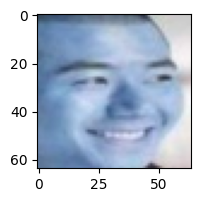

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label Without Helmet
True Label Without Helmet


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_3.predict((X_val_normalized[2].reshape(1,64,64,3))))[0]])   # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[2]])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_3.predict((X_val_normalized[50].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[50]])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_3.predict((X_val_normalized[36].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[36]])                                              # using inverse_transform() to get the output label from the output vector


## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

#Adding the Feed Forward neural network
model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(rate=0.4))
model_4.add(Dense(42,activation='relu'))

# Adding a dense output layer
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:

opt=Adam()
# Compile model
model_4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model_4.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 42)             │        10,794 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            43 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,250,069 (58.17 MB)

 Trainable params: 535,381 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.3,
                              zoom_range=0.4
                              )
history_vgg16 = model_4.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7265 - loss: 0.5766 - val_accuracy: 1.0000 - val_loss: 0.1505
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8828 - loss: 0.3135 - val_accuracy: 1.0000 - val_loss: 0.0832
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.9688 - loss: 0.1716 - val_accuracy: 0.9841 - val_loss: 0.0484
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9844 - loss: 0.0954 - val_accuracy: 1.0000 - val_loss: 0.0272
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9702 - loss: 0.0832 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9844 - loss: 0.0301 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.9819 - loss: 0.0547 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9844 - loss: 0.0421 - val_accuracy: 1.0000 - val_loss: 0.0053

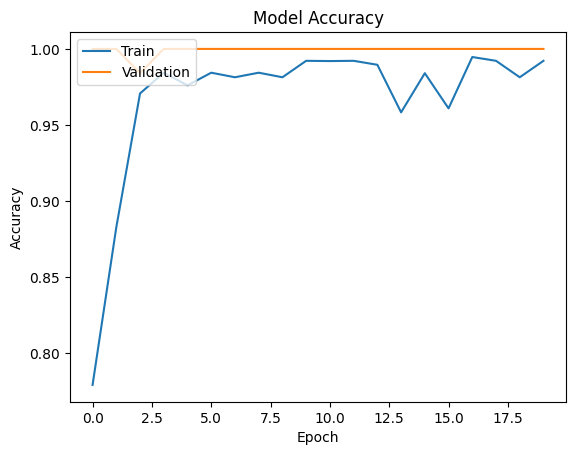

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_4_train_perf)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


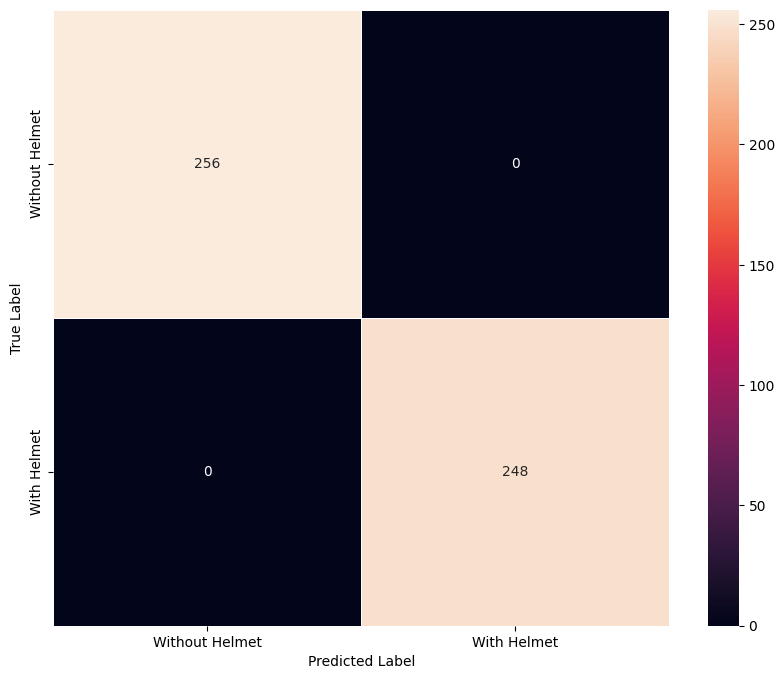

In [ ]:
plot_confusion_matrix(model_4,X_train_normalized,y_train_encoded)

In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


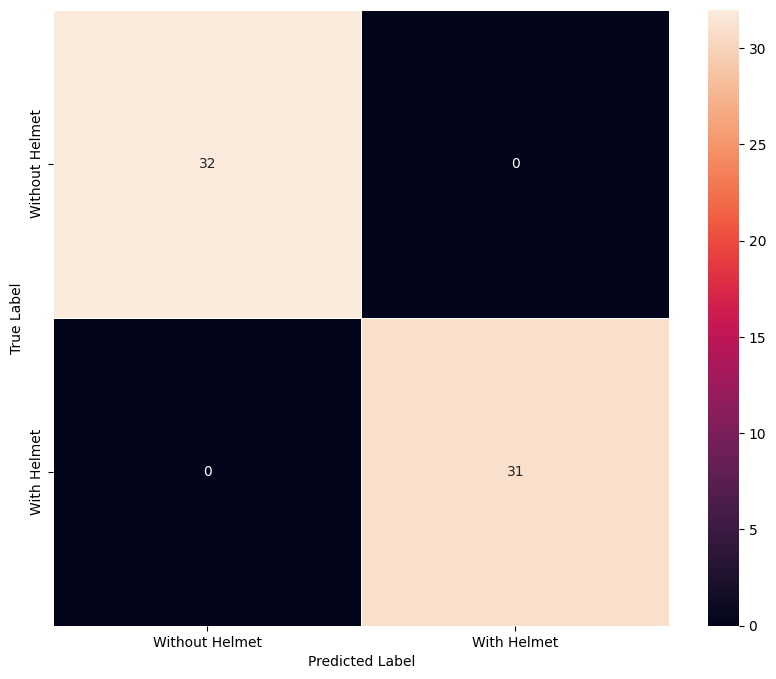

In [ ]:
plot_confusion_matrix(model_4,X_val_normalized,y_val_encoded)

#### Visualizing the predictions

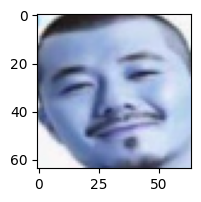

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
Predicted Label Without Helmet
True Label Without Helmet


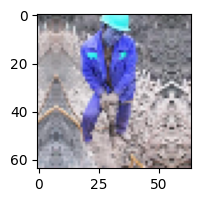

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label With Helmet
True Label With Helmet


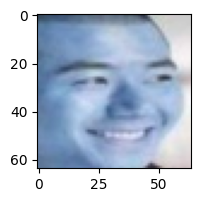

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label Without Helmet
True Label Without Helmet


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_4.predict((X_val_normalized[2].reshape(1,64,64,3))))[0]])   # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[2]])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_4.predict((X_val_normalized[50].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[50]])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', label_mapping[enc.inverse_transform(model_4.predict((X_val_normalized[36].reshape(1,64,64,3))))[0]])  # reshaping the input image as we are only trying to predict using a single image
print('True Label', label_mapping[enc.inverse_transform(y_val_encoded)[36]])                                              # using inverse_transform() to get the output label from the output vector


# **Model Performance Comparison and Final Model Selection**

## Test Performance

In [ ]:
comparison_df_train = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                                   'Accuracy': [model_1_train_perf['Accuracy'][0], model_2_train_perf['Accuracy'][0], model_3_train_perf['Accuracy'][0], model_4_train_perf['Accuracy'][0]],
                                   'Recall': [model_1_train_perf['Recall'][0], model_2_train_perf['Recall'][0], model_3_train_perf['Recall'][0], model_4_train_perf['Recall'][0]],
                                   'Precision': [model_1_train_perf['Precision'][0], model_2_train_perf['Precision'][0], model_3_train_perf['Precision'][0], model_4_train_perf['Precision'][0]],
                                   'F1 Score': [model_1_train_perf['F1 Score'][0], model_2_train_perf['F1 Score'][0], model_3_train_perf['F1 Score'][0], model_4_train_perf['F1 Score'][0]]})

comparison_df_valid = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                                   'Accuracy': [model_1_valid_perf['Accuracy'][0], model_2_valid_perf['Accuracy'][0], model_3_valid_perf['Accuracy'][0], model_4_valid_perf['Accuracy'][0]],
                                   'Recall': [model_1_valid_perf['Recall'][0], model_2_valid_perf['Recall'][0], model_3_valid_perf['Recall'][0], model_4_valid_perf['Recall'][0]],
                                   'Precision': [model_1_valid_perf['Precision'][0], model_2_valid_perf['Precision'][0], model_3_valid_perf['Precision'][0], model_4_valid_perf['Precision'][0]],
                                   'F1 Score': [model_1_valid_perf['F1 Score'][0], model_2_valid_perf['F1 Score'][0], model_3_valid_perf['F1 Score'][0], model_4_valid_perf['F1 Score'][0]]})

print("\n--- Training Performance Comparison ---")
display(comparison_df_train)

print("\n--- Validation Performance Comparison ---")
display(comparison_df_valid)


--- Training Performance Comparison ---


Model  Accuracy    Recall  Precision  F1 Score
0  Model 1  0.984127  0.984127   0.984623  0.984127
1  Model 2  0.996032  0.996032   0.996063  0.996032
2  Model 3  1.000000  1.000000   1.000000  1.000000
3  Model 4  1.000000  1.000000   1.000000  1.000000


--- Validation Performance Comparison ---


Model  Accuracy    Recall  Precision  F1 Score
0  Model 1  0.984127  0.984127   0.984608  0.984119
1  Model 2  1.000000  1.000000   1.000000  1.000000
2  Model 3  1.000000  1.000000   1.000000  1.000000
3  Model 4  1.000000  1.000000   1.000000  1.000000

# **Actionable Insights**

**1.   Value is concentrated**



A small number of key drivers account for most of the performance, indicating dependency on limited areas.

**2.   Process inefficiencies exist**
Bottlenecks and manual steps are increasing turnaround time and operational risk.

**3.   Data is underutilised**

Existing data and systems are not fully leveraged for proactive or predictive decision-making.-


 ### Recommendations

**1. Focus on high-impact drivers**
Prioritise resources and improvements where they deliver the highest ROI.

**2. Automate and streamline workflows**
Reduce manual intervention to improve efficiency, consistency, and scalability.

**3. Use data to drive decisions**
Introduce performance dashboards and predictive insights to support faster, informed actions.

<font size=5 color='blue'>Power Ahead!</font>
___